# Task 3 labels

In [18]:
import scanpy as sc
import pandas as pd

In [8]:
adata = sc.read('task3_coarse.h5ad')

In [13]:
adata.obs['coarse_ct'] = adata.obs['qual_ct'].apply(lambda x: 'B' if x=='B?' else x)
adata.obs['coarse_ct'] = adata.obs['coarse_ct'].apply(lambda x: 'cDC' if x=='DC' else x)
adata.obs['coarse_ct'] = adata.obs['coarse_ct'].apply(lambda x: 'pDC' if x=='Megakaryocyte' else x)
adata.obs['coarse_ct'] = adata.obs['coarse_ct'].apply(lambda x: 'Unreliable' if x=='??' else x)

/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


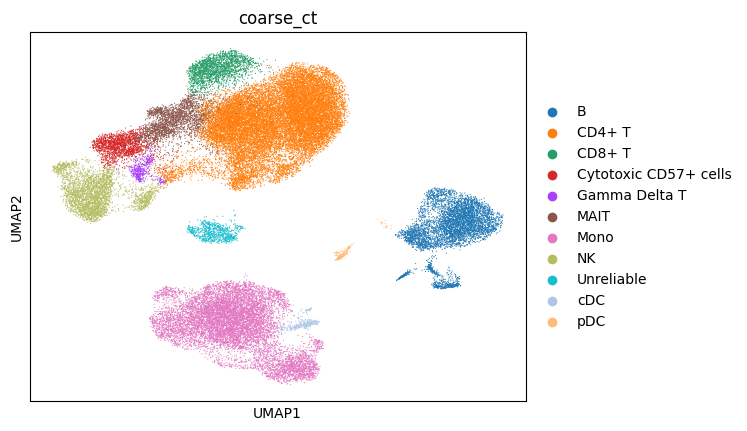

In [15]:
sc.pl.umap(adata, color='coarse_ct', save='task3_coarse_umap.png')

In [22]:
pd.DataFrame(zip(adata.obs.index, adata.obs['coarse_ct']), columns=['cell_ids', 'cell_type'])\
    .to_csv('task3.coarse_cell_types.csv', index=False)

In [23]:
adata.write('task3_coarse.h5ad')

### Fine labels

In [26]:
b_fine = sc.read('b_fine.h5ad').obs['fine_ct']
cd4_fine = sc.read('cd4_fine.h5ad').obs['fine_ct']
cd8_fine = sc.read('cd8_fine.h5ad').obs['fine_ct']
mono_fine = sc.read('mono_fine.h5ad').obs['fine_ct']
nk_fine = sc.read('nk_fine.h5ad').obs['fine_ct']

In [30]:
meta = adata.obs.copy()

In [29]:
b_fine

GN21-SCG1_AAACCTGCATCCGTGG-1           Naive
GN21-SCG1_AAACCTGGTTCCGTCT-1           Naive
GN21-SCG1_AAACGGGAGAAACGAG-1    Plasma cells
GN21-SCG1_AAACGGGTCCGCAAGC-1    Plasma cells
GN21-SCG1_AAAGATGTCCAGATCA-1           Naive
                                    ...     
GN27-SCG1_TTTGGTTCAGGTTTCA-1        memory B
GN27-SCG1_TTTGTCAAGAGTAAGG-1    Transitional
GN27-SCG1_TTTGTCACACAAGACG-1        memory B
GN27-SCG1_TTTGTCATCCTAGGGC-1        memory B
GN27-SCG1_TTTGTCATCTAACGGT-1    Transitional
Name: fine_ct, Length: 5463, dtype: category
Categories (5, object): ['Naive', 'Transitional', 'Plasma cells', 'marginal zone B', 'memory B']

In [28]:
meta.loc[b_fine.index] = b_fine.values

KeyError: "None of [Index(['Naive', 'Naive', 'Plasma cells', 'Plasma cells', 'Naive',\n       'Transitional', 'Naive', 'marginal zone B', 'Naive', 'Naive',\n       ...\n       'Transitional', 'Transitional', 'Transitional', 'Transitional',\n       'Transitional', 'memory B', 'Transitional', 'memory B', 'memory B',\n       'Transitional'],\n      dtype='object', length=5463)] are in the [index]"

In [27]:
adata

AnnData object with n_obs × n_vars = 48518 × 1700
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'siccaid', 'pSS', 'ssa', 'percent.mt', 'percent.ribo', 'PoolID', 'nCount_ADT', 'nFeature_ADT', 'age', 'sex', 'b_tobacco', 'ssb', 'fs', 'fs_detailed', 'b_lymphoma', 'b_systinvol', 'immune_meds', 'lympho', 'is_pool_GN21', 'is_pool_GN22', 'is_pool_GN27', 'leiden', 'is_9', 'is_2', 'is_4', 'is_0', 'is_14', 'is_7', 'is_1', 'is_5', 'is_11', 'is_3', 'is_6', 'is_10', 'is_16', 'is_13', 'is_22', 'is_8', 'is_19', 'is_18', 'is_17', 'is_21', 'is_20', 'is_15', 'is_12', 'qual_ct', 'coarse_ct'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'PoolID_colors', 'hvg', 'is_0_colors', 'is_10_colors', 'is_11_colors', 'is_12_colors', 'is_13_colors', 'is_14_colors', 'is_15_colors', 'is_16_colors', 'is_17_colors', 'is_18_colors', 'is_19_colors', 'is_1_colors', 'is_20_colors', 'is_21_colors', 'is_22_colors', 'is_2_colors', 'is_3_colors', 'is_4_colors', '